## Author : Ibrahim Sobh
### Kaggle House Prices - Advanced Regression Technique.
- Predict sales prices and practice feature engineering, RFs, and gradient boosting

## 1 - Importing Libraries & Loading Data

In [1355]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import preprocessing

train_data=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

## 2.1 - Display Train Data

In [1328]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.2 - Display Test Data

In [1329]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3.1 - Check up for columns with missing Data

In [1330]:
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [1331]:
test_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
FireplaceQu     50.000000
LotFrontage     15.547945
GarageYrBlt      5.342466
GarageQual       5.342466
GarageFinish     5.342466
GarageCond       5.342466
dtype: float64

## 3.2 -Drop Unwanted Columns ( columns with a lot of missing data)

In [1332]:
train_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [1333]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1334]:
test_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [1335]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


# 4.0-  Features Selection

## 4.1 - Encode Categorical Features 

In [1336]:
oe = preprocessing.OrdinalEncoder()

# Train Categories Encoding
train_categorical_features = train_data.select_dtypes(include=['object']).columns
train_numerical_features= train_data.select_dtypes([np.int64,np.float64]).columns

train_data[train_categorical_features]=oe.fit_transform(train_data[train_categorical_features])

# Test Categories Encoding
test_categorical_features = test_data.select_dtypes(include=['object']).columns
test_numerical_features= test_data.select_dtypes([np.int64,np.float64]).columns

test_data[test_categorical_features]=oe.fit_transform(test_data[test_categorical_features])

## 4.2 - Fill Features with Null /NA values

In [1337]:
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
dtype: float64

In [1338]:
test_data.isnull().sum().sort_values(ascending=False).head(15) / len(test_data) *100

LotFrontage     15.558602
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
Utilities        0.137080
dtype: float64

In [1339]:
train_data[train_numerical_features]=train_data[train_numerical_features].fillna(train_data[train_numerical_features].median())

for feature in train_categorical_features:
    train_data[feature].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    train_data[feature].interpolate(method ='linear', limit_direction ='backward',inplace=True)
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [1340]:
test_data[test_numerical_features]=test_data[test_numerical_features].fillna(test_data[test_numerical_features].median())

for feature in test_categorical_features:
    test_data[feature].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    test_data[feature].interpolate(method ='linear', limit_direction ='backward',inplace=True)

test_data.isnull().sum().sort_values(ascending=False).head(15) / len(test_data) *100

Id              0.0
GarageType      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
dtype: float64

## 4.3 - Test Correlation between Targeted Feature and Possible Features

In [1341]:
corr_with=train_data.corrwith(train_data["SalePrice"]).sort_values(ascending=False)
print(corr_with[corr_with>0].head(20),"\n-------------------------")
print(corr_with[corr_with<0].tail(20))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
dtype: float64 
-------------------------
LowQualFinSF    -0.025606
YrSold          -0.028923
SaleType        -0.054911
LotConfig       -0.067396
BsmtFinType1    -0.067599
OverallCond     -0.077856
MSSubClass      -0.084284
BldgType        -0.085591
Heating         -0.098812
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.280667
GarageType      -0.342142
HeatingQC       -0.400178
GarageFinish    -0.494033
KitchenQual     

## 4.4 Decide Which Features is best to use

<AxesSubplot:>

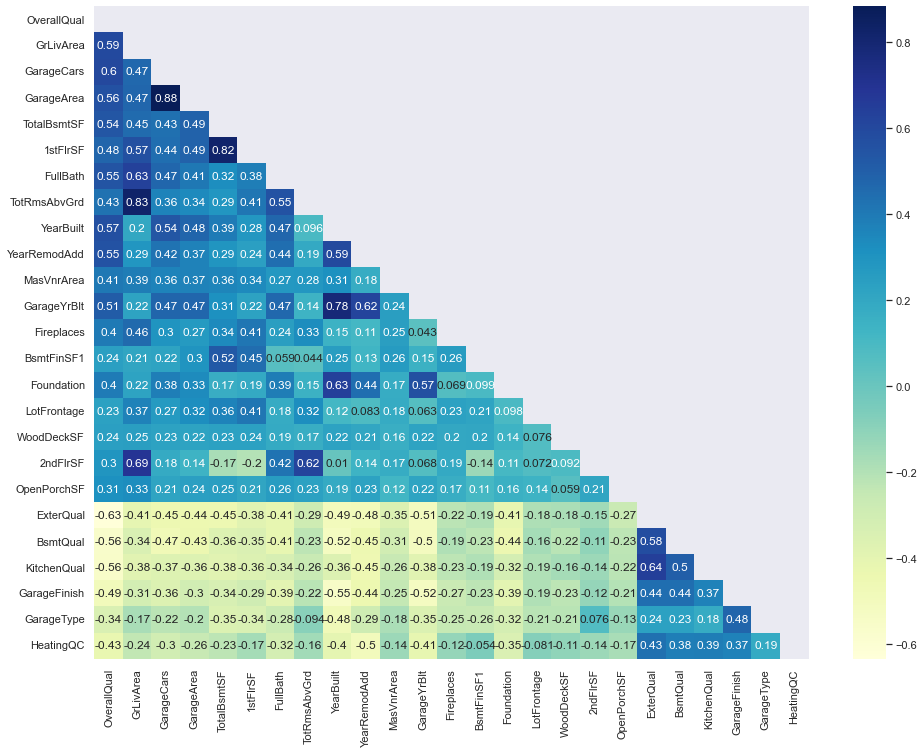

In [1342]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF",
                  "1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd",
                  "MasVnrArea","GarageYrBlt","Fireplaces","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]


X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.set(rc = {'figure.figsize':(16,12)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)


- __Seeing this heat map we can remove the features with very high correlations between each other so we have unique features__

- __we need ro remove one of "GarageArea" or "GarageCars"__
- __we need ro remove one of ,"TotalBsmtSF","1stFlrSF" ...__




## 4.5 - Selected Features Display 

<AxesSubplot:>

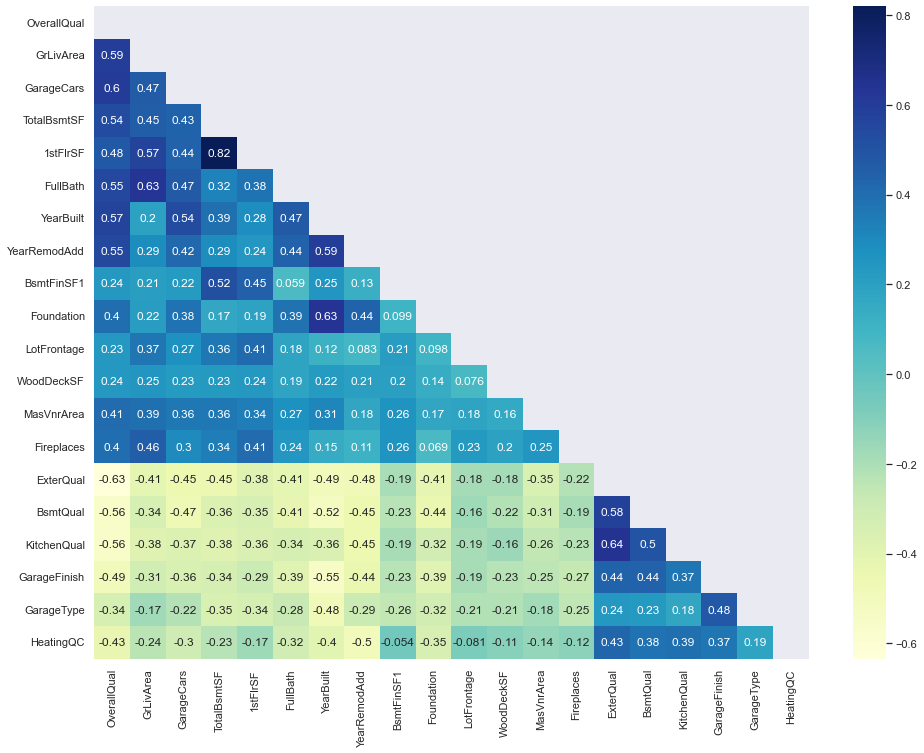

In [1343]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF",
                  "FullBath","YearBuilt","YearRemodAdd","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","MasVnrArea","Fireplaces",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]

X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.set(rc = {'figure.figsize':(16,12)})
sns.heatmap(corr,mask=((np.triu(np.ones_like(corr)))),cmap="YlGnBu",annot=True)

## 5 -  Scale ( Standarize ) &  split data into Train | Validation 

In [1344]:
scalar =preprocessing.StandardScaler()
X_scaled=pd.DataFrame(scalar.fit_transform(X),columns = X.columns)
y = train_data.SalePrice               
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                  test_size=0.08,
                                                 random_state = 42)
print('train:', len(X_train), 'validation:', len(X_val))

train: 1343 validation: 117


## 6.1 - Apply Linear Regression on Training Set

In [1345]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

def export_Submission_file(predicition_dataframe,output_file_name):
    Output = pd.DataFrame()
    Output['Id'] = predicition_dataframe['Id']
    Output['SalePrice'] = predicition_dataframe['y_pred']
    Output.to_csv("../"+output_file_name+".txt", index=False)

In [1359]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_train)
y= y_train.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))
print("R2 :",metrics.r2_score(y_train,y_pred))

Root-Mean-Squared-Error : 0.1673
R2 : 0.8110166143178846


## 6.2 - Apply Linear Regression coefficients on Validation Set

In [1362]:
y_pred=model.predict(X_val)
y= y_val.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))
print("R2 :",metrics.r2_score(y,y_pred))

Root-Mean-Squared-Error : 0.1691
R2 : 0.848651515112306


## 6.3 - Apply Linear Regression coefficients on Testing Set and produce Submision

In [1348]:
X_test = test_data[list_of_columns]
X_test_scaled=pd.DataFrame(scalar.fit_transform(X_test),columns = X_test.columns)
X_test_scaled["y_pred"]=model.predict(X_test_scaled)
X_test_scaled["Id"]=test_data["Id"]
X_test_scaled["y_pred"]=abs(X_test_scaled["y_pred"])
X_test_scaled[["Id","y_pred"]]

,Id,y_pred
0,1461,102157.686361
1,1462,167419.272017
2,1463,182631.308469
3,1464,200151.933903
4,1465,200932.934406
...,...,...
1454,2915,69015.194887
1455,2916,83371.593136
1456,2917,173137.039315
1457,2918,104873.509748


## 6.4 - Export file 

In [1349]:
export_Submission_file(X_test_scaled[["Id","y_pred"]],"submission_model_1")

## 7.1 - Apply Random Forest Regression coefficients on Trainign Set

In [1363]:
regr = RandomForestRegressor(n_estimators=1000,max_depth=40, random_state=50,criterion="squared_error")
regr.fit(X_train, y_train)
y_pred=regr.predict(X_train)
y= y_train.ravel()

y_pred=y_pred.ravel()
y_pred =abs(y_pred)
y_pred

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))
print("R2 :",metrics.r2_score(y,y_pred))

Root-Mean-Squared-Error : 0.0628
R2 : 0.9778504506602183


## 7.2 - Apply Random Forest Regression coefficients on Validation Set

In [1364]:
y_pred=regr.predict(X_val)
y= y_val.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))
print("R2 :",metrics.r2_score(y,y_pred))

Root-Mean-Squared-Error : 0.1221
R2 : 0.8883796692794214


## 7.3 - Apply Random Forest Regressionon  on Testing Set and produce Submision

In [1352]:
X_test = test_data[list_of_columns]
X_test_scaled=pd.DataFrame(scalar.fit_transform(X_test),columns = X_test.columns)
X_test_scaled["y_pred"]=regr.predict(X_test_scaled)
X_test_scaled["Id"]=test_data["Id"]
X_test_scaled["y_pred"]=abs(X_test_scaled["y_pred"])
X_test_scaled[["Id","y_pred"]]

,Id,y_pred
0,1461,122318.778
1,1462,155262.382
2,1463,181640.536
3,1464,188890.668
4,1465,196105.508
...,...,...
1454,2915,82390.199
1455,2916,87677.759
1456,2917,154499.136
1457,2918,122519.599


## 7.4 - Export file 

In [1353]:
export_Submission_file(X_test_scaled[["Id","y_pred"]],"submission_model_2")